In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
from custom_qiskit_v3_1.datageneration import Sklearn_DataLoader
from custom_qiskit_v3_1.classifier import Kernel, BinarySVM
import numpy as np 
from matplotlib import pyplot as plt 
from tqdm.notebook import tqdm

dl = Sklearn_DataLoader('iris', labels=(1,2), mean=0, normalize=None)
X, y, _, _ = dl(90, 0)

Cs = np.logspace(-8, 10, 100)

In [3]:
kernel = Kernel('linear')
svm = BinarySVM(kernel=kernel, C=None, mutation='REDUCED_SVM')
svm.fit(X, y)
svm.accuracy(X, y)

0.5777777777777777

In [4]:
svm.b

0.00043210387229919434

In [5]:
kernel = Kernel('linear')
svm = BinarySVM(kernel=kernel, C=None, mutation='SVM')
svm.fit(X, y)
svm.accuracy(X, y)

0.7

In [6]:
svm.b

0.00014321765758925015

In [7]:

result = []
mutations = ['SVM', 'QASVM', 'REDUCED_SVM', 'REDUCED_QASVM']
for C in tqdm(Cs):
    svms = [BinarySVM(kernel, C, mut) for mut in mutations]
    [svm.fit(X, y) for svm in svms]
    err = [1-svm.accuracy(X, y) if svm.status=='optimal' else None for svm in svms]
    result.append(err)
result = np.array(result).T

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
svms = [BinarySVM(kernel, None, mut) for mut in mutations]
[svm.fit(X, y) for svm in svms]
hard_margins = np.array([1-svm.accuracy(X, y) if svm.status=='optimal' else np.inf for svm in svms])

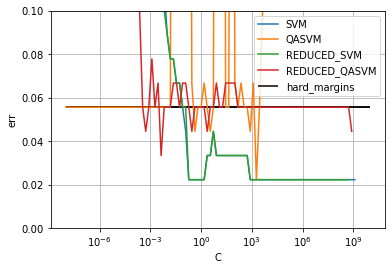

In [9]:
plt.plot(Cs, result[0], label=mutations[0])
plt.plot(Cs, result[1], label=mutations[1])
plt.plot(Cs, result[2], label=mutations[2])
plt.plot(Cs, result[3], label=mutations[3])

plt.hlines(hard_margins, min(Cs), max(Cs), label='hard_margins')

plt.legend()
plt.grid()
plt.xlabel('C')
plt.ylabel('err')
plt.ylim([0, 0.1])
plt.xscale('log')


In [10]:
hard_margins

array([       inf, 0.05555556,        inf, 0.05555556])

In [11]:
from custom_qiskit_v3_1.datageneration import Sklearn_DataLoader
from custom_qiskit_v3_1.classifier import Kernel, BinarySVM
import numpy as np 
from matplotlib import pyplot as plt 
from tqdm.notebook import tqdm

kernel = Kernel('RBF', 1)
repeat = 100
Cs = np.logspace(-8, 8, 100)
options = ['SVM', 'REDUCED_SVM', 'QASVM', 'REDUCED_QASVM']
svm_s = np.empty((len(options), len(Cs), repeat))
svm_dict = {}

dl = Sklearn_DataLoader('iris', labels=(1,2), normalize=None)

for i, C in enumerate(tqdm(Cs)):
    for j, mut in enumerate(options):
        for k in range(repeat):
            svm = BinarySVM(kernel, C, mut)
            X, y, Xt, yt = dl(2**6, 0)
            svm.fit(X, y)
            svm_s[j, i, k] = 1-svm.accuracy(Xt, yt) if svm.status=='optimal' else None
            svm_dict[(j, i, k)] = svm
svm_means = svm_s.mean(axis=2)
svm_stds = svm_s.std(axis=2)

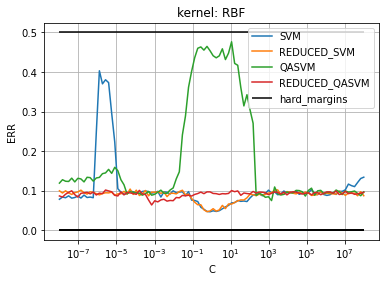

In [13]:
plt.figure()
#[plt.errorbar(Cs, svm_means[i], yerr=svm_stds[i], label = options[i]) for i in range(len(options))]
[plt.plot(Cs, svm_means[i], label = options[i]) for i in range(len(options))]
svms = [BinarySVM(kernel, None, mut) for mut in options]
X, y, _, _ = dl(100, 0)
[svm.fit(X, y) for svm in svms]
hard_margins = np.array([1-svm.accuracy(X, y) if svm.status=='optimal' else np.inf for svm in svms])
plt.hlines(hard_margins, min(Cs), max(Cs), label='hard_margins')
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('ERR')
plt.title(f'kernel: {kernel.kind}')
plt.savefig('./figs/MyFig.png')

In [12]:
import dill                            #pip install dill --user
filename = 'globalsave.pkl'
dill.dump_session(filename)

# and to load the session again:
dill.load_session(filename)

In [4]:
import dill 
filename = 'globalsave.pkl'
dill.load_session(filename)

In [5]:
Cs

array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1.17681195e-05,
       1.70735265e-05, 2.47707636e-05, 3.59381366e-05, 5.21400829e-05,
       7.56463328e-05, 1.09749877e-04, 1.59228279e-04, 2.31012970e-04,
       3.35160265e-04, 4.86260158e-04, 7.05480231e-04, 1.02353102e-03,
       1.48496826e-03, 2.15443469e-03, 3.12571585e-03, 4.53487851e-03,
       6.57933225e-03, 9.54548457e-03, 1.38488637e-02, 2.00923300e-02,
       2.91505306e-02, 4.22924287e-02, 6.13590727e-02, 8.90215085e-02,
       1.29154967e-01, 1.87381742e-01, 2.71858824e-01, 3.94420606e-01,
       5.72236766e-01, 8.30217568e-01, 1.20450354e+00, 1.74752840e+00,
       2.53536449e+00, 3.67837977e+00, 5.33669923e+00, 7.74263683e+00,
      